In [1857]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')


# Take a quick look at the data

In [1858]:
#  https://www.kaggle.com/datasets/denkuznetz/food-delivery-time-prediction

In [1859]:
df = pd.read_csv('C:\Food Delivery _Times\Food_Delivery_Times.csv')

In [1860]:
print("First few rows of the dataset and shape:")
print(df.shape)
df.head()


First few rows of the dataset and shape:
(1000, 9)


,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [1861]:
print("\nData structure information:")
print(df.info())


Data structure information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB
None


In [1862]:
print("\nSummary statistics of numerical columns:")
print(df.describe())


Summary statistics of numerical columns:
          Order_ID  Distance_km  Preparation_Time_min  Courier_Experience_yrs  \
count  1000.000000  1000.000000           1000.000000              970.000000   
mean    500.500000    10.059970             16.982000                4.579381   
std     288.819436     5.696656              7.204553                2.914394   
min       1.000000     0.590000              5.000000                0.000000   
25%     250.750000     5.105000             11.000000                2.000000   
50%     500.500000    10.190000             17.000000                5.000000   
75%     750.250000    15.017500             23.000000                7.000000   
max    1000.000000    19.990000             29.000000                9.000000   

       Delivery_Time_min  
count        1000.000000  
mean           56.732000  
std            22.070915  
min             8.000000  
25%            41.000000  
50%            55.500000  
75%            71.000000  
max         

In [1863]:
print("\nSummary statistics of categorical columns:")
print(df.describe(include='O'))


Summary statistics of categorical columns:
       Weather Traffic_Level Time_of_Day Vehicle_Type
count      970           970         970         1000
unique       5             3           4            3
top      Clear        Medium     Morning         Bike
freq       470           390         308          503


In [1864]:
print("\nData types of each column:")
print(df.dtypes)


Data types of each column:
Order_ID                    int64
Distance_km               float64
Weather                    object
Traffic_Level              object
Time_of_Day                object
Vehicle_Type               object
Preparation_Time_min        int64
Courier_Experience_yrs    float64
Delivery_Time_min           int64
dtype: object


In [1865]:
print("\nUnique values in each column:")
print(df.nunique())


Unique values in each column:
Order_ID                  1000
Distance_km                785
Weather                      5
Traffic_Level                3
Time_of_Day                  4
Vehicle_Type                 3
Preparation_Time_min        25
Courier_Experience_yrs      10
Delivery_Time_min          108
dtype: int64


In [1866]:
print("\nValue counts for the 'Weather' column:")
print(df['Weather'].value_counts())


Value counts for the 'Weather' column:
Weather
Clear    470
Rainy    204
Foggy    103
Snowy     97
Windy     96
Name: count, dtype: int64


In [1867]:
print("\nNumber of duplicate rows:")
print(df.duplicated().sum())


Number of duplicate rows:
0


### Target

In [1868]:
X = df.drop('Delivery_Time_min', axis=1)
y = df['Delivery_Time_min']

# Handle Missing Values (Imputation)

In [1869]:
# Drop rows with missing values
df.drop(columns=['Order_ID'], axis=1, inplace=True)        

# Drop duplicate rows
df = df.drop_duplicates()

# numeric and categorical features
numeric_features = df.select_dtypes(exclude=['object']).columns
categorical_features = df.select_dtypes(include=['object']).columns

# Impute missing values
numeric_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Imputer to fill null values
df[numeric_features] = numeric_imputer.fit_transform(df[numeric_features])
df[categorical_features] = categorical_imputer.fit_transform(df[categorical_features])

In [1870]:
# Check for missing values
df.isnull().sum()

Distance_km               0
Weather                   0
Traffic_Level             0
Time_of_Day               0
Vehicle_Type              0
Preparation_Time_min      0
Courier_Experience_yrs    0
Delivery_Time_min         0
dtype: int64

# EDA

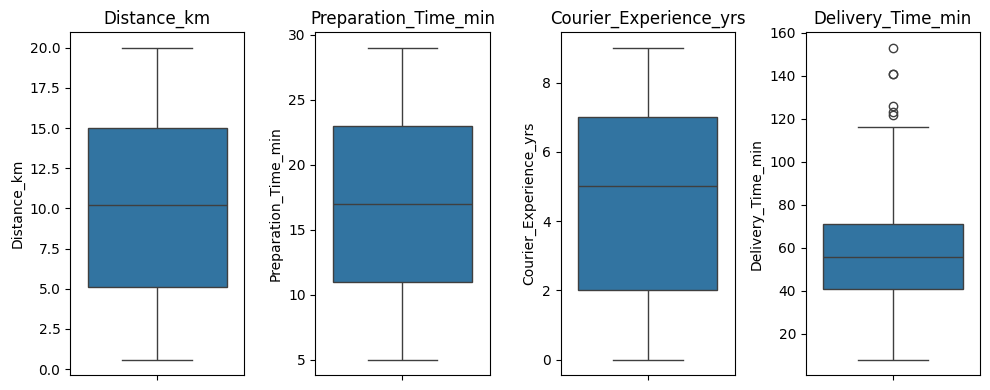

In [1871]:
plt.figure(figsize=(10, 4))

for i, col in enumerate(numeric_features):
    plt.subplot(1, len(numeric_features), i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

## Categorical features - Value counts

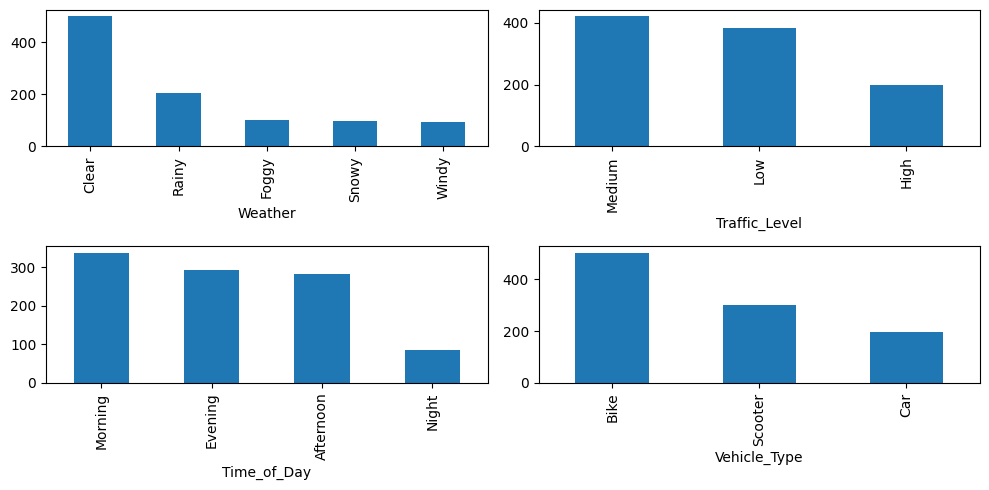

In [1872]:
plt.figure(figsize=(10, 5))

for i, col in enumerate(categorical_features):
    plt.subplot((len(categorical_features)+1)//2, 2, i + 1)
    # sns.boxplot(y=df[col])
    df[col].value_counts().plot(kind='bar')
    # plt.title(col)

plt.tight_layout()
plt.show()

## Heatmap to visualize correlations between features

<Axes: >

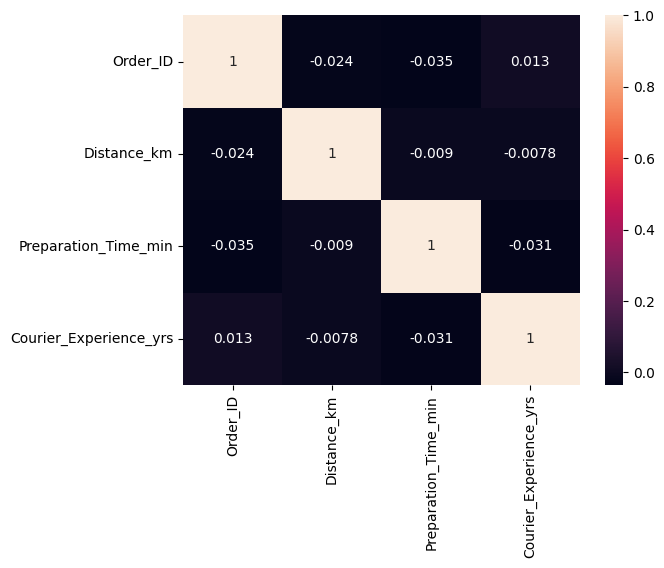

In [1873]:
numeric_columns = X.select_dtypes(exclude=['object']).columns
c= X[numeric_columns].corr()
sns.heatmap(c, annot=True)

In [1874]:
X = pd.get_dummies(
            X,
            columns=categorical_features,
            drop_first=True)
X

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Traffic_Level_Low,Traffic_Level_Medium,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Vehicle_Type_Car,Vehicle_Type_Scooter
0,522,7.93,12,1.0,False,False,False,True,True,False,False,False,False,False,True
1,738,16.42,20,2.0,False,False,False,False,False,True,True,False,False,False,False
2,741,9.52,28,1.0,True,False,False,False,True,False,False,False,True,False,True
3,661,7.44,5,1.0,False,True,False,False,False,True,False,False,False,False,True
4,412,19.03,16,5.0,False,False,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,107,8.50,13,3.0,False,False,False,False,False,False,True,False,False,True,False
996,271,16.28,8,9.0,False,True,False,False,True,False,False,True,False,False,True
997,861,15.62,26,2.0,False,False,True,False,False,False,True,False,False,False,True
998,436,14.17,8,0.0,False,False,False,False,True,False,False,False,False,False,False


### Histogram

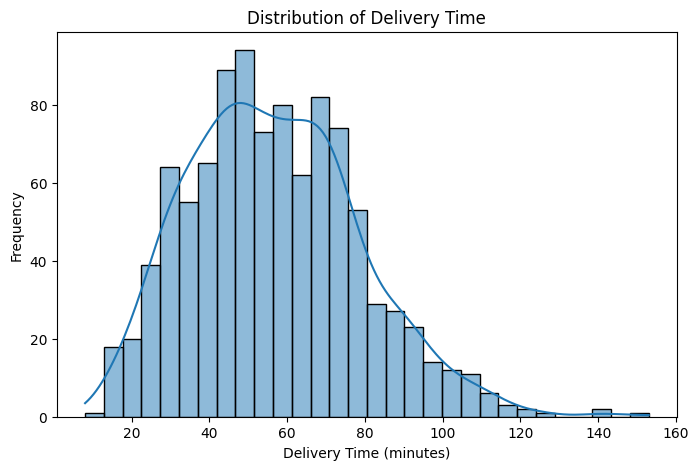

In [1875]:

plt.figure(figsize=(8, 5))
sns.histplot(y, bins=30, kde=True)
plt.title("Distribution of Delivery Time")
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Frequency")
plt.show()

### Boxplot for outlier detection

### Skewness & Kurtosis

In [1876]:
print("Skewness:", y.skew())
print("Kurtosis:", y.kurtosis())


Skewness: 0.5072511816152696
Kurtosis: 0.29133821183324615


## Train Split

In [1877]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nValue Counts for Target Variable (Random Split):")
print("Training set ():")
print(y_train.value_counts(normalize=True)) 
print("\nValidation set ():")
print("\nTest set ():")
print(y_test.value_counts(normalize=True))   


Value Counts for Target Variable (Random Split):
Training set ():
Delivery_Time_min
71     0.02625
48     0.02375
65     0.02250
44     0.02250
49     0.02125
        ...   
106    0.00125
88     0.00125
102    0.00125
115    0.00125
90     0.00125
Name: proportion, Length: 107, dtype: float64

Validation set ():

Test set ():
Delivery_Time_min
57    0.045
63    0.035
35    0.035
43    0.030
51    0.030
      ...  
82    0.005
26    0.005
74    0.005
33    0.005
29    0.005
Name: proportion, Length: 74, dtype: float64


In [1878]:
print("\nTrain shape:", X_train.shape, "Test shape:", X_test.shape)


Train shape: (800, 15) Test shape: (200, 15)


# Model Training

In [1879]:
# Define a function for training and evaluating models
def train_and_evaluate(models, X_train, y_train, X_test, y_test):
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        
        # Predictions
        y_pred = model.predict(X_test)
        
        # Evaluation Metrics
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        
        # Store results
        results[name] = {'R2 score': r2,'MSE':mse,'RMSE': rmse,'MAE':mae}
        
    results = pd.DataFrame(results)
    return results

In [1880]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean') 
X_train = imputer.fit_transform(X_train) 
X_test = imputer.transform(X_test)


In [1881]:
# Define models
lr_model = LinearRegression()
rfr_model = RandomForestRegressor(n_estimators=100, random_state=42)
xgb_model = XGBRegressor(n_estimators=100,learning_rate=0.1,random_state=42)

models = {
    "XGBoost Regressor": xgb_model,
    "Random Forest Regressor": rfr_model,
    "Linear Regression": lr_model
}

# Call the function
results = train_and_evaluate(models, X_train, y_train, X_test, y_test)

In [1882]:
results

,XGBoost Regressor,Random Forest Regressor,Linear Regression
R2 score,0.726124,0.738008,0.821913
MSE,122.758812,117.431765,79.823304
RMSE,11.079658,10.836594,8.934389
MAE,7.792880,7.547700,5.999335


# Save the best model

In [1883]:
model_path = 'Linear_Regression_model.pkl'
model = lr_model

with open(model_path, 'wb') as file:
    pickle.dump(model, file)

### Explore relationships between features and other features

                        Distance_km  Preparation_Time_min  \
Distance_km                1.000000             -0.009025   
Preparation_Time_min      -0.009025              1.000000   
Courier_Experience_yrs    -0.005951             -0.031124   
Delivery_Time_min          0.816535              0.305535   

                        Courier_Experience_yrs  Delivery_Time_min  
Distance_km                          -0.005951           0.816535  
Preparation_Time_min                 -0.031124           0.305535  
Courier_Experience_yrs                1.000000          -0.085540  
Delivery_Time_min                    -0.085540           1.000000  


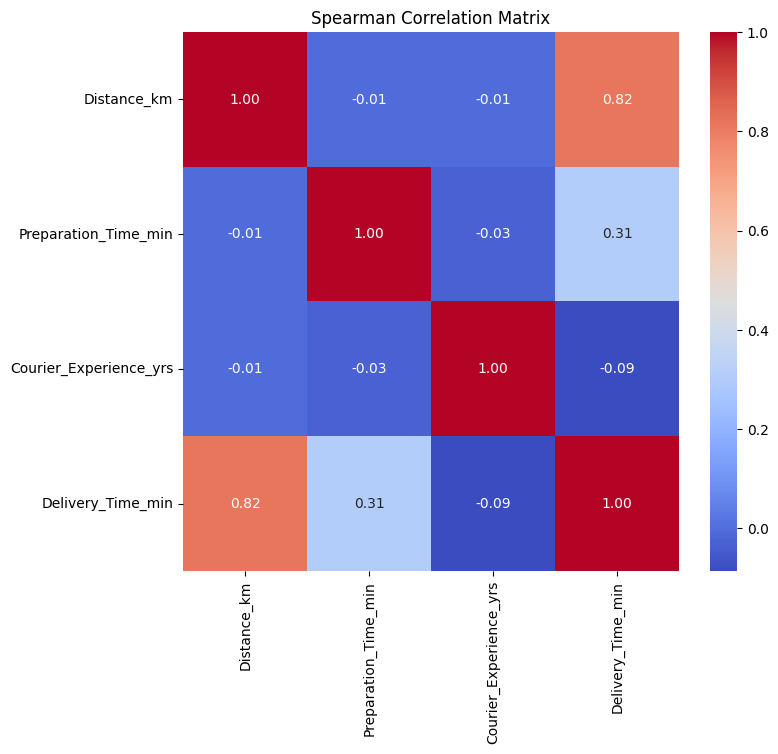

In [1884]:
numeric_df = df.select_dtypes(include=['number'])
spearman_corr = numeric_df.corr(method='spearman')


print(spearman_corr)


plt.figure(figsize=(8, 7))
sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Spearman Correlation Matrix')
plt.show()